In [57]:
import numpy as np
import pandas as pd

In [58]:
df = pd.read_csv("cost_revenue_dirty.csv")

In [59]:
df.describe()

,Rank
count,5391.000000
mean,2696.000000
std,1556.391981
min,1.000000
25%,1348.500000
50%,2696.000000
75%,4043.500000
max,5391.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release Date           5391 non-null   object
 2   Movie Title            5391 non-null   object
 3   Production Budget ($)  5391 non-null   object
 4   Worldwide Gross ($)    5391 non-null   object
 5   Domestic Gross ($)     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [61]:
df.head(5)

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [62]:
df.columns

Index(['Rank', 'Release Date', 'Movie Title', 'Production Budget ($)',
       'Worldwide Gross ($)', 'Domestic Gross ($)'],
      dtype='object')

In [63]:
df['Production Budget ($)'][:5]

0    $110,000
1    $385,907
2    $200,000
3    $100,000
4    $245,000
Name: Production Budget ($), dtype: object

In [64]:
df['Production Budget ($)'] = df['Production Budget ($)'].str.replace('$', '', regex=False)

In [66]:
df['Production Budget ($)'] = pd.to_numeric(df['Production Budget ($)'])

ValueError: Unable to parse string "110,000" at position 0

In [17]:
df['Worldwide Gross ($)'][:5]

0    $11,000,000
1             $0
2     $8,000,000
3     $3,000,000
4    $22,000,000
Name: Worldwide Gross ($), dtype: object

In [18]:
df['Worldwide Gross ($)'] = df['Worldwide Gross ($)'].str.replace('$', '', regex=False)

In [19]:
df['Worldwide Gross ($)'] = df['Worldwide Gross ($)'].str.replace(',', '', regex=False)

In [20]:
df['Worldwide Gross ($)'].astype(int)

0       11000000
1              0
2        8000000
3        3000000
4       22000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: Worldwide Gross ($), Length: 5391, dtype: int64

In [23]:
df.head()

,Production Budget ($),Worldwide Gross ($)
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000


In [22]:
df.drop(['Rank', 'Release Date', 'Movie Title','Domestic Gross ($)'],axis=1, inplace=True)

In [75]:
df1 = df[df['Worldwide Gross ($)'] != 0]

#

In [74]:
df1.shape

(5391, 2)

In [24]:
import numpy as np
df['Worldwide Gross ($)'] = df['Worldwide Gross ($)'].replace(0, np.nan)
# df = df.dropna(how='all', axis=0)
# df = df.replace(np.nan, 0)

In [25]:
df.head()

,Production Budget ($),Worldwide Gross ($)
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000


In [26]:
df.to_csv('cleaned_cost_revenue.csv', index=False)

In [67]:
import matplotlib.pyplot as plt

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
data = pd.read_csv("cleaned_cost_revenue.csv")

In [70]:
data.describe()

,Production_Budget_usd,Worldwide_Gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [71]:
data.columns

Index(['Production_Budget_usd', 'Worldwide_Gross_usd'], dtype='object')

In [72]:
X = data.drop('Worldwide_Gross_usd', axis=1)
y = data.drop('Production_Budget_usd',axis=1)

In [73]:
X

,Production_Budget_usd
0,1000000
1,10000
2,400000
3,750000
4,10000
...,...
5029,225000000
5030,215000000
5031,306000000
5032,200000000


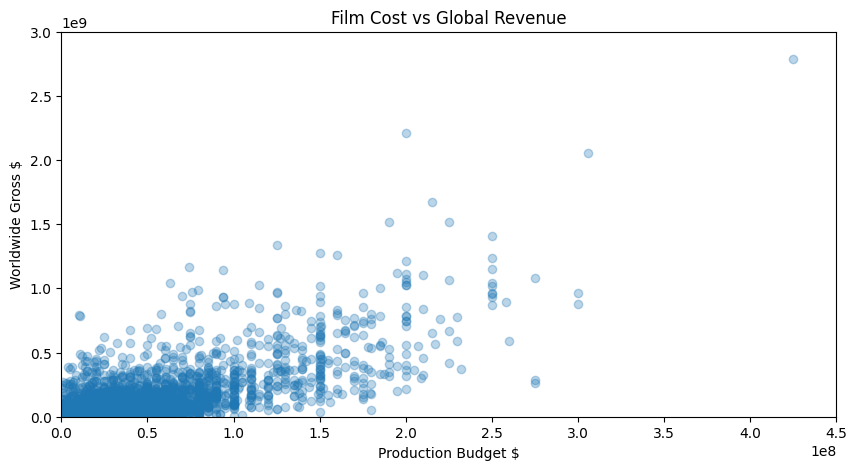

In [74]:
plt.figure(figsize=(10,5))
plt.scatter(X,y, alpha=0.3)
plt.title('Film Cost vs Global Revenue')
plt.xlabel("Production Budget $")
plt.ylabel("Worldwide Gross $")
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

In [75]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

In [76]:
regression.coef_

array([[3.11150918]])

In [77]:
regression.intercept_

array([-7236192.72913958])

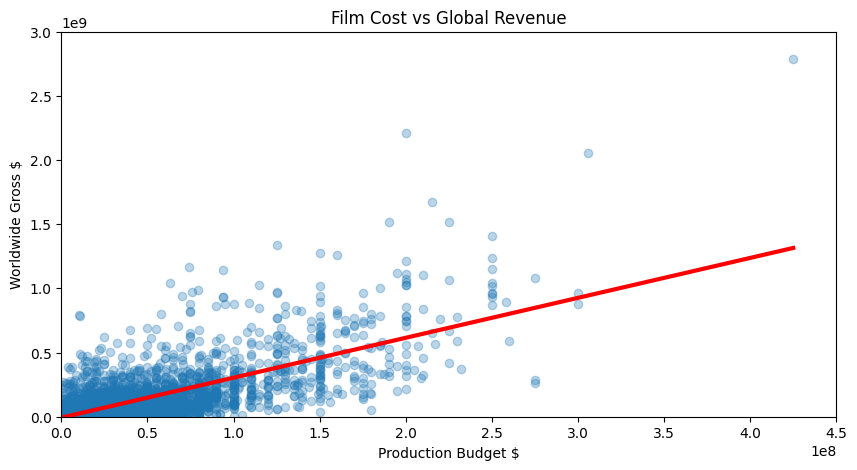

In [78]:
plt.figure(figsize=(10,5))
plt.scatter(X,y, alpha=0.3)

#Adding the regression line here
plt.plot(X, regression.predict(X), color='red', linewidth=3)

plt.title('Film Cost vs Global Revenue')
plt.xlabel("Production Budget $")
plt.ylabel("Worldwide Gross $")
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

In [79]:
regression.predict([[500000]])

/Users/mac/Desktop/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-5680438.13767152]])

In [80]:
1.48339266e+08

148339266.0

In [81]:
-5680438.13767152

-5680438.13767152

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train.shape

(4027, 1)

In [87]:
y_train.shape

(4027, 1)

In [89]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [91]:
prediction = model.predict(X_test)

In [92]:
model_mse = mean_squared_error(y_test, prediction)

In [94]:
model_mae = mean_absolute_error(y_test, prediction)

In [95]:
model.score(X_train, y_train)

0.5477181609372233